必要なライブラリのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ターゲット分布（ここでは平均 
mu=0, 標準偏差 
sigma=1 のガウス分布）の負の対数尤度関数（ポテンシャルエネルギー関数に相当）とその勾配を定義します。

In [2]:
def negative_log_likelihood(x):
    """ターゲット分布の負の対数尤度（ポテンシャルエネルギー）"""
    mu = 0
    sigma = 1
    return 0.5 * ((x - mu) / sigma)**2

def gradient_negative_log_likelihood(x):
    """負の対数尤度の勾配"""
    mu = 0
    sigma = 1
    return (x - mu) / (sigma**2)

ランジュバンモンテカルロ法のサンプリング関数

In [ ]:
def langevin_monte_carlo(n_samples, initial_x, step_size):
    """
    ランジュバンモンテカルロ法によるサンプリング
    n_samples: サンプル数
    initial_x: 初期値
    step_size: ステップサイズ
    """
    samples = np.zeros(n_samples) # サンプルを格納する配列
    current_x = initial_x # 初期値

    for i in range(n_samples): 
        # 確率的な勾配降下 + ランダムノイズ
        gradient = gradient_negative_log_likelihood(current_x) # 勾配を計算
        noise = np.random.normal(0, np.sqrt(2 * step_size)) # ランダムノイズを生成
        proposal_x = current_x - step_size * gradient + noise # 提案点を計算

        # メトロポリス・ヘイスティングス法の受理確率（ここでは常に受理されるLMCを実装）
        # より厳密には、離散化誤差を考慮した受理判定が必要ですが、ここでは省略します。
        current_x = proposal_x # 更新
        samples[i] = current_x # サンプルを保存

    return samples

サンプリングの実行　結果の可視化

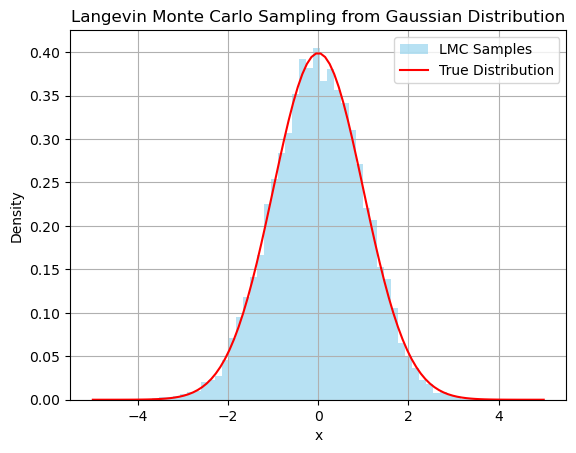

In [ ]:
# パラメータ設定
n_samples = 10000 # サンプル数
initial_x = 5.0 # 初期値
step_size = 0.1 # ステップサイズ

# サンプリング実行
samples = langevin_monte_carlo(n_samples, initial_x, step_size)

# 結果の可視化
plt.hist(samples, bins=50, density=True, alpha=0.6, color='skyblue', label='LMC Samples')

# 真の分布
x_plot = np.linspace(-5, 5, 100)
true_distribution = np.exp(-0.5 * x_plot**2) / np.sqrt(2 * np.pi)
plt.plot(x_plot, true_distribution, 'r', label='True Distribution')

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Langevin Monte Carlo Sampling from Gaussian Distribution')
plt.legend()
plt.grid(True)
plt.show()

このコードでは、単純なランジュバン動力学に基づいて新しいサンプルを提案し、ここでは常に提案を受け入れています。より厳密なLMCの実装では、メトロポリス・ヘイスティングス法の枠組みの中で、提案の受理・棄却ステップを含めることで、離散化による誤差を補正します。

補足:

ステップサイズ (
epsilon or step_size): LMCの性能に大きく影響するハイパーパラメータです。小さすぎると収束が遅くなり、大きすぎるとサンプルの棄却率が高くなる可能性があります。
メトロポリス・ヘイスティングス (MH) のステップ: 上記の単純な実装ではMHの受理判定を省略していますが、より一般的なLMCでは、提案された新しい状態の受理確率を計算し、それに基づいて受理・棄却を行います。受理確率は、詳細釣り合い条件を満たすように設計されます。